**Load the required libraries and data**

In [1]:
# Libraries 
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
# Data  
demographics = pd.read_csv("../data/Demographic Data.csv", 
                             encoding='UTF-16', delimiter="\t")

# EXPLANATORY DATA ANALYSIS 
## Data Assessment

In [3]:
demographics.head()

,Chart#,Ethnicity,Race,Gender,Address,City,State,Zipcode,Intake Education Degree,Intake Employment Current Employer,...,Intake Employment Retired,Intake Employment Student,Intake Employment Unemployed,Intake Employment Working,Intake Family Divorced,Intake Family Married,Intake Family Partnered,Intake Family Single,Intake Family Widowed,Unnamed: 21
0,NaN,,,NaN,NaN,NaN,NaN,NaN,,,...,,,,,,,,,,NaN
1,1.0,,,F,253 NORFOLK STREET,CAMBRIDGE,MA,02139,,,...,,,,,,,,,,NaN
2,2.0,,,F,48 UNION PARK,BOSTON,MA,02118,,,...,,,,,,,,,,NaN
3,3.0,,,M,164 PALMER STREET,ARLINGTON,MA,02474,,,...,,,,,,,,,,NaN
4,4.0,,,F,110 HARTWELL ROAD,BEDFORD,MA,01730,,,...,,,,,,,,,,NaN


In [4]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Chart#                              2685 non-null   float64
 1   Ethnicity                           2686 non-null   object 
 2   Race                                2686 non-null   object 
 3   Gender                              2685 non-null   object 
 4   Address                             2666 non-null   object 
 5   City                                2663 non-null   object 
 6   State                               2661 non-null   object 
 7   Zipcode                             2665 non-null   object 
 8   Intake Education Degree             2684 non-null   object 
 9   Intake Employment Current Employer  2580 non-null   object 
 10  Intake Employment Disabled          2412 non-null   object 
 11  Intake Employment Occupation        2632 no

In [5]:
demographics["Ethnicity"].unique()

array([' ', 'Not Hispanic or Latino', 'Hispanic or Latino',
       'Declined to Specify', 'Unknown'], dtype=object)

In [6]:
demographics["Chart#"].nunique()

2685

## Data Wrangling 

In [7]:
# Replace blank values with nan
demographics.replace({' ':np.NaN}, inplace=True)

In [8]:
threshold = 0.5 * demographics.shape[0]

# Drops columns with more than 50% null values 
demographics = demographics.loc[:, demographics.isna().sum() < threshold]

In [9]:
demographics.shape

(2686, 6)

In [10]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Chart#   2685 non-null   float64
 1   Gender   2685 non-null   object 
 2   Address  2666 non-null   object 
 3   City     2663 non-null   object 
 4   State    2661 non-null   object 
 5   Zipcode  2665 non-null   object 
dtypes: float64(1), object(5)
memory usage: 126.0+ KB


In [11]:
# Drop the first row  
demographics.drop(index=0, inplace=True)

In [12]:
demographics["City"] = demographics["City"].str.upper()

## Data Analysis and Visualization

In [13]:
demographics.head()

,Chart#,Gender,Address,City,State,Zipcode
1,1.0,F,253 NORFOLK STREET,CAMBRIDGE,MA,02139
2,2.0,F,48 UNION PARK,BOSTON,MA,02118
3,3.0,M,164 PALMER STREET,ARLINGTON,MA,02474
4,4.0,F,110 HARTWELL ROAD,BEDFORD,MA,01730
5,5.0,M,613A EAST 8TH STREET,BOSTON,MA,02127


In [14]:
demographics["State"].value_counts()

State
MA    2373
NH      51
NY      44
RI      36
CT      20
CA      19
VT      17
ME      16
NJ      12
PA      11
MD       7
TX       6
FL       6
VA       5
UT       4
TN       3
NC       3
OH       3
MI       2
PR       2
ON       2
WA       2
MO       2
CO       2
IL       2
MN       2
PO       1
NM       1
KS       1
IN       1
DV       1
SC       1
GU       1
WY       1
LA       1
Name: count, dtype: int64

In [15]:
demographics["City"].value_counts()

City
CAMBRIDGE         328
BOSTON            255
SOMERVILLE        166
ARLINGTON          65
JAMAICA PLAIN      61
                 ... 
EAST GREENWICH      1
MATTAPOISETT        1
ROSLYN              1
MENLO PARK          1
WEST DOVER          1
Name: count, Length: 477, dtype: int64

Most of the patients come from Cambridge, SomerVille and Boston. Lets find out what before mid-2023 what cities patients came from in Cambridge facilities 

In [16]:
# Load the appointment data 
required_columns = ['Date Of Service', 'Appt Status Description','Chartnumber', 'Appt Type Group', 'Facility City']

appointments = pd.read_csv("../data/Appointments List.csv",
                          encoding='UTF-16', delimiter="\t",
                          usecols=required_columns)

# Remove the first row
appointments.drop(index=0, inplace=True)

# Convert the chart number in appointments to numeric 
appointments["Chartnumber"] = pd.to_numeric(appointments["Chartnumber"], errors='coerce')

# Convert date of appointment to datetime object
appointments["Date"] = pd.to_datetime(appointments["Date Of Service"], errors="coerce")


# join with the demographics data 
df = pd.merge(left=appointments, right=demographics, 
             left_on="Chartnumber", right_on="Chart#")


/tmp/ipykernel_35361/2565336536.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  appointments = pd.read_csv("../data/Appointments List.csv",
/tmp/ipykernel_35361/2565336536.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  appointments["Date"] = pd.to_datetime(appointments["Date Of Service"], errors="coerce")


In [17]:
assert df["Chartnumber"].equals(df["Chart#"])
df.drop(["Chartnumber","Date Of Service"], axis=1, inplace=True)

In [18]:
df.head()

,Appt Status Description,Appt Type Group,Facility City,Date,Chart#,Gender,Address,City,State,Zipcode
0,Seen,Intake,CAMBRIDGE,2018-01-22,1.0,F,253 NORFOLK STREET,CAMBRIDGE,MA,02139
1,Seen,TMS,CAMBRIDGE,2018-02-05,1.0,F,253 NORFOLK STREET,CAMBRIDGE,MA,02139
2,Seen,TMS,CAMBRIDGE,2018-02-06,1.0,F,253 NORFOLK STREET,CAMBRIDGE,MA,02139
3,Seen,TMS,CAMBRIDGE,2018-02-07,1.0,F,253 NORFOLK STREET,CAMBRIDGE,MA,02139
4,Seen,TMS,CAMBRIDGE,2018-02-08,1.0,F,253 NORFOLK STREET,CAMBRIDGE,MA,02139


In [19]:
# Get the appointments in cambridge with a successfull MH infusions 
cambridge_mh_success = df[(df["Appt Status Description"]=="Seen")\
               &(df["Facility City"]=="CAMBRIDGE")\
               &(df["Appt Type Group"]=="MH Infusion")].reset_index(drop=True)
cambridge_mh_success.head()

,Appt Status Description,Appt Type Group,Facility City,Date,Chart#,Gender,Address,City,State,Zipcode
0,Seen,MH Infusion,CAMBRIDGE,2018-01-22,2.0,F,48 UNION PARK,BOSTON,MA,02118
1,Seen,MH Infusion,CAMBRIDGE,2018-02-02,2.0,F,48 UNION PARK,BOSTON,MA,02118
2,Seen,MH Infusion,CAMBRIDGE,2018-02-02,2.0,F,48 UNION PARK,BOSTON,MA,02118
3,Seen,MH Infusion,CAMBRIDGE,2018-02-02,2.0,F,48 UNION PARK,BOSTON,MA,02118
4,Seen,MH Infusion,CAMBRIDGE,2018-02-05,2.0,F,48 UNION PARK,BOSTON,MA,02118


In [20]:
# get the data before and after mid-2023
decided_date = pd.to_datetime("2023-06-01")

cambridge_mh_success_before_mid_2023 = cambridge_mh_success[cambridge_mh_success["Date"]<decided_date].reset_index(drop=True)
cambridge_mh_success_after_mid_2023 = cambridge_mh_success[cambridge_mh_success["Date"]>=decided_date].reset_index(drop=True)

In [22]:
cambridge_mh_success_after_mid_2023

,Appt Status Description,Appt Type Group,Facility City,Date,Chart#,Gender,Address,City,State,Zipcode
0,Seen,MH Infusion,CAMBRIDGE,2023-09-12,59.0,M,8 WHITTIER PLACE UNIT15D,BOSTON,MA,02114
1,Seen,MH Infusion,CAMBRIDGE,2023-09-15,59.0,M,8 WHITTIER PLACE UNIT15D,BOSTON,MA,02114
2,Seen,MH Infusion,CAMBRIDGE,2023-09-18,59.0,M,8 WHITTIER PLACE UNIT15D,BOSTON,MA,02114
3,Seen,MH Infusion,CAMBRIDGE,2023-09-20,59.0,M,8 WHITTIER PLACE UNIT15D,BOSTON,MA,02114
4,Seen,MH Infusion,CAMBRIDGE,2023-09-25,59.0,M,8 WHITTIER PLACE UNIT15D,BOSTON,MA,02114
...,...,...,...,...,...,...,...,...,...,...
3716,Seen,MH Infusion,CAMBRIDGE,2024-11-08,2647.0,M,45 Burnett St,JAMAICA PLAIN,MA,02130
3717,Seen,MH Infusion,CAMBRIDGE,2024-11-11,2647.0,M,45 Burnett St,JAMAICA PLAIN,MA,02130
3718,Seen,MH Infusion,CAMBRIDGE,2024-11-14,2647.0,M,45 Burnett St,JAMAICA PLAIN,MA,02130
3719,Seen,MH Infusion,CAMBRIDGE,2024-11-08,2661.0,F,46 Black Burnian Road,WESTON,MA,02493


## Data Visualization

<Axes: xlabel='City'>

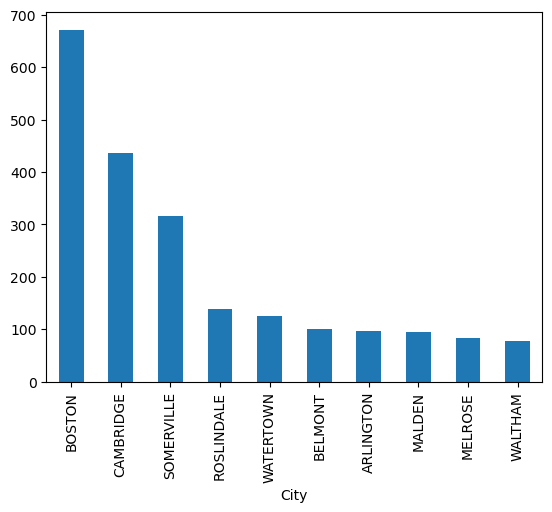

In [31]:
cambridge_mh_success_after_mid_2023["City"].value_counts()[:10].plot(kind="bar")

<Axes: xlabel='City'>

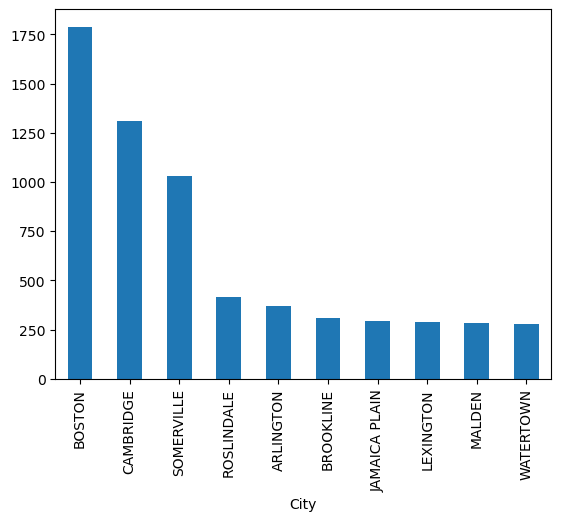

In [30]:
cambridge_mh_success_before_mid_2023["City"].value_counts()[:10].plot(kind="bar")